In [1]:
from core.lca_calculation_functions import get_inventory_dataset, run_lca, compute_midpoint_contributions

In [2]:
# Brightway imports
import bw2data as bd
import brightway2 as bw

In [3]:
import pandas as pd
import re

# Set up BW and LCIs

In [4]:
BW_PROJECT = 'metallican' # insert your project name here
bd.projects.set_current(BW_PROJECT)
bd.databases

Databases dictionary with 16 object(s):
	Copper
	Gold
	Iron
	LIB raw materials
	Nickel
	Regioinvent
	Silver
	Zinc
	biosphere3
	biosphere3_spatialized_flows
	ecoinvent-3.10-cutoff
	ecoinvent-3.10-cutoff regionalized
	ei_cutoff_3.10_gcam_SSP2-RCP26_2025 2025-11-04
	ei_cutoff_3.10_tiam-ucl_SSP2-RCP45_2025 2025-11-04
	metallican_lci
	tailings

In [5]:
EI_DB = 'ecoinvent-3.10-cutoff'
RI_DB = 'Regioinvent'
METALLICAN_DB = 'metallican_lci'

In [6]:
iw_methods = [method for method in bd.methods if "impact world+" in " ".join(method).lower()]
iw_methods

[('IMPACT World+ v2.0.1, footprint version',
  'climate change',
  'carbon footprint'),
 ('IMPACT World+ v2.0.1, footprint version',
  'ecosystem quality',
  'remaining ecosystem quality damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'energy resources: non-renewable',
  'fossil and nuclear energy use'),
 ('IMPACT World+ v2.0.1, footprint version',
  'human health',
  'remaining human health damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'water use',
  'water scarcity footprint'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate c

In [7]:
from utils.constants import IMPACT_METHODS_MP_EQ, IMPACT_METHODS_MP_HH

In [8]:
from core.inventories import INVENTORIES_CA_ei, INVENTORIES_CA_reg, INVENTORIES_metallican_metal

In [9]:
INVENTORIES_CA_EI_ds = get_inventory_dataset(INVENTORIES_CA_ei, database_names=[EI_DB])

In [10]:
INVENTORIES_CA_RI_ds = get_inventory_dataset(INVENTORIES_CA_reg, database_names=[RI_DB])

In [ ]:
INVENTORIES_METALLICAN_metal_ds = get_inventory_dataset(INVENTORIES_metallican_metal, database_names=[METALLICAN_DB])

# Run simple LCAs and compare EI vs RI

In [ ]:
df_metallican_eq = run_lca(INVENTORIES_METALLICAN_metal_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_EQ)
df_metallican_hh = run_lca(INVENTORIES_METALLICAN_metal_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_HH)

In [ ]:
df_ei_eq = run_lca(INVENTORIES_CA_EI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_EQ)
df_ei_hh = run_lca(INVENTORIES_CA_EI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_HH)
df_ri_eq = run_lca(INVENTORIES_CA_RI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_EQ)
df_ri_hh = run_lca(INVENTORIES_CA_RI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_HH)

In [ ]:
# df_metallican_eq.to_csv(r'results/MetalliCan_lci/economic_allocation/metallican_eq_mp.csv', index=False)
# df_metallican_hh.to_csv(r'results/MetalliCan_lci/economic_allocation/metallican_hh_mp.csv', index=False)
# df_ei_eq.to_csv(r'results/EI/ei_eq_mp.csv', index=False)
# df_ei_hh.to_csv(r'results/EI/ei_hh_mp.csv', index=False)
# df_ri_eq.to_csv(r'results/RI/ri_eq_mp.csv', index=False)
# df_ri_hh.to_csv(r'results/RI/ri_hh_mp.csv', index=False)

In [ ]:
# df_metallican_eq = pd.read_csv(r'results/MetalliCan_lci/economic_allocation/metallican_eq_mp.csv')
# df_metallican_hh = pd.read_csv(r'results/MetalliCan_lci/economic_allocation/metallican_hh_mp.csv')
# df_ei_eq = pd.read_csv(r'results/EI/ei_eq_mp.csv')
# df_ei_hh = pd.read_csv(r'results/EI/ei_hh_mp.csv')
# df_ri_eq = pd.read_csv(r'results/RI/ri_eq_mp.csv')
# df_ri_hh = pd.read_csv(r'results/RI/ri_hh_mp.csv')

In [ ]:
# Function to clean column names (remove units in parentheses and extra spaces)
def clean_columns(df):
    df = df.copy()
    df.columns = [re.sub(r"\s*\([^)]*\)", "", col).strip() for col in df.columns]
    return df

# Function to apply mapping and sum duplicates
def aggregate_impacts(df, mapping):
    df = df.rename(columns={k: v for k, v in mapping.items() if k in df.columns})
    num_cols = df.select_dtypes(include=['number']).columns
    df_agg = df.groupby(df.columns, axis=1).sum() if len(num_cols) == 0 else df.groupby(level=0, axis=0).sum()
    df = df.groupby(df.columns, axis=1).sum()
    df = df.groupby(level=0, axis=0).sum()
    df = df.groupby(df.columns, axis=1).sum()
    df = df.groupby(df.columns, axis=1).sum()
    # Group columns by name (summing duplicates after mapping)
    df = df.groupby(level=0, axis=1).sum()
    return df


In [ ]:
from utils.constants import agg_mapping_eq, agg_mapping_hh

In [ ]:
df_metallican_eq = clean_columns(df_metallican_eq)
df_metallican_hh = clean_columns(df_metallican_hh)
df_ei_eq = clean_columns(df_ei_eq)
df_ei_hh = clean_columns(df_ei_hh)
df_ri_eq = clean_columns(df_ri_eq)
df_ri_hh = clean_columns(df_ri_hh)

In [ ]:
df_metallican_eq = aggregate_impacts(df_metallican_eq, mapping=agg_mapping_eq)
df_metallican_hh = aggregate_impacts(df_metallican_hh, mapping=agg_mapping_hh)
df_ei_eq = aggregate_impacts(df_ei_eq, mapping=agg_mapping_eq)
df_ei_hh = aggregate_impacts(df_ei_hh, mapping=agg_mapping_hh)
df_ri_eq = aggregate_impacts(df_ri_eq, mapping=agg_mapping_eq)
df_ri_hh = aggregate_impacts(df_ri_hh, mapping=agg_mapping_hh)

In [ ]:
df_metallican_eq.to_csv(r'results/MetalliCan_lci/economic_allocation/metallican_eq_mp_agg.csv', index=False)
df_metallican_hh.to_csv(r'results/MetalliCan_lci/economic_allocation/metallican_hh_mp_agg.csv', index=False)
df_ei_eq.to_csv(r'results/EI/ei_eq_mp_agg.csv', index=False)
df_ei_hh.to_csv(r'results/EI/ei_hh_mp_agg.csv', index=False)
df_ri_eq.to_csv(r'results/RI/ri_eq_mp_agg.csv', index=False)
df_ri_hh.to_csv(r'results/RI/ri_hh_mp_agg.csv', index=False)

# Compare EI vs RI

In [ ]:
from utils.visualisation_functions import plot_relative_difference_heatmap

In [ ]:
plot_relative_difference_heatmap(df_ei= df_ei_eq, df_ri=df_ri_eq, title='', output_png=r'results/RI/heatmap_ri_vs_ei_eq.png')
plot_relative_difference_heatmap(df_ei= df_ei_hh, df_ri=df_ri_hh, title='', output_png=r'results/RI/heatmap_ri_vs_ei_hh.png')

# MP contributions to EP

In [11]:
damage_method_version="IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10"
all_damage = [m for m in bw.methods if m[0] == damage_method_version]

In [12]:
df_ei_hh_contrib, df_ei_eq_contrib = compute_midpoint_contributions(INVENTORIES_CA_EI_ds, amount=1)
df_ri_hh_contrib, df_ri_eq_contrib = compute_midpoint_contributions(INVENTORIES_CA_RI_ds, amount=1)

In [13]:
df_ei_hh_contrib.to_csv(r'results/EI/ei_hh_mp_contr.csv', index=False)
df_ei_eq_contrib.to_csv(r'results/EI/ei_eq_mp_contr.csv', index=False)
df_ri_hh_contrib.to_csv(r'results/RI/ri_hh_mp_contr.csv', index=False)
df_ri_eq_contrib.to_csv(r'results/RI/ri_eq_mp_contr.csv', index=False)

In [ ]:
# df_ei_hh_contrib = pd.read_csv(r'results/EI/ei_hh_mp_contr.csv')
# df_ei_eq_contrib = pd.read_csv(r'results/EI/ei_eq_mp_contr.csv')
# df_ri_hh_contrib = pd.read_csv(r'results/RI/ri_hh_mp_contr.csv')
# df_ri_eq_contrib = pd.read_csv(r'results/RI/ri_eq_mp_contr.csv')

In [14]:
from utils.visualisation_functions import plot_midpoint_contributions

Plot saved to results/EI/ei_hh_contrib.png
Plot saved to results/EI/ei_eq_contrib.png
Plot saved to results/RI/ri_hh_contrib.png
Plot saved to results/RI/ri_eq_contrib.png


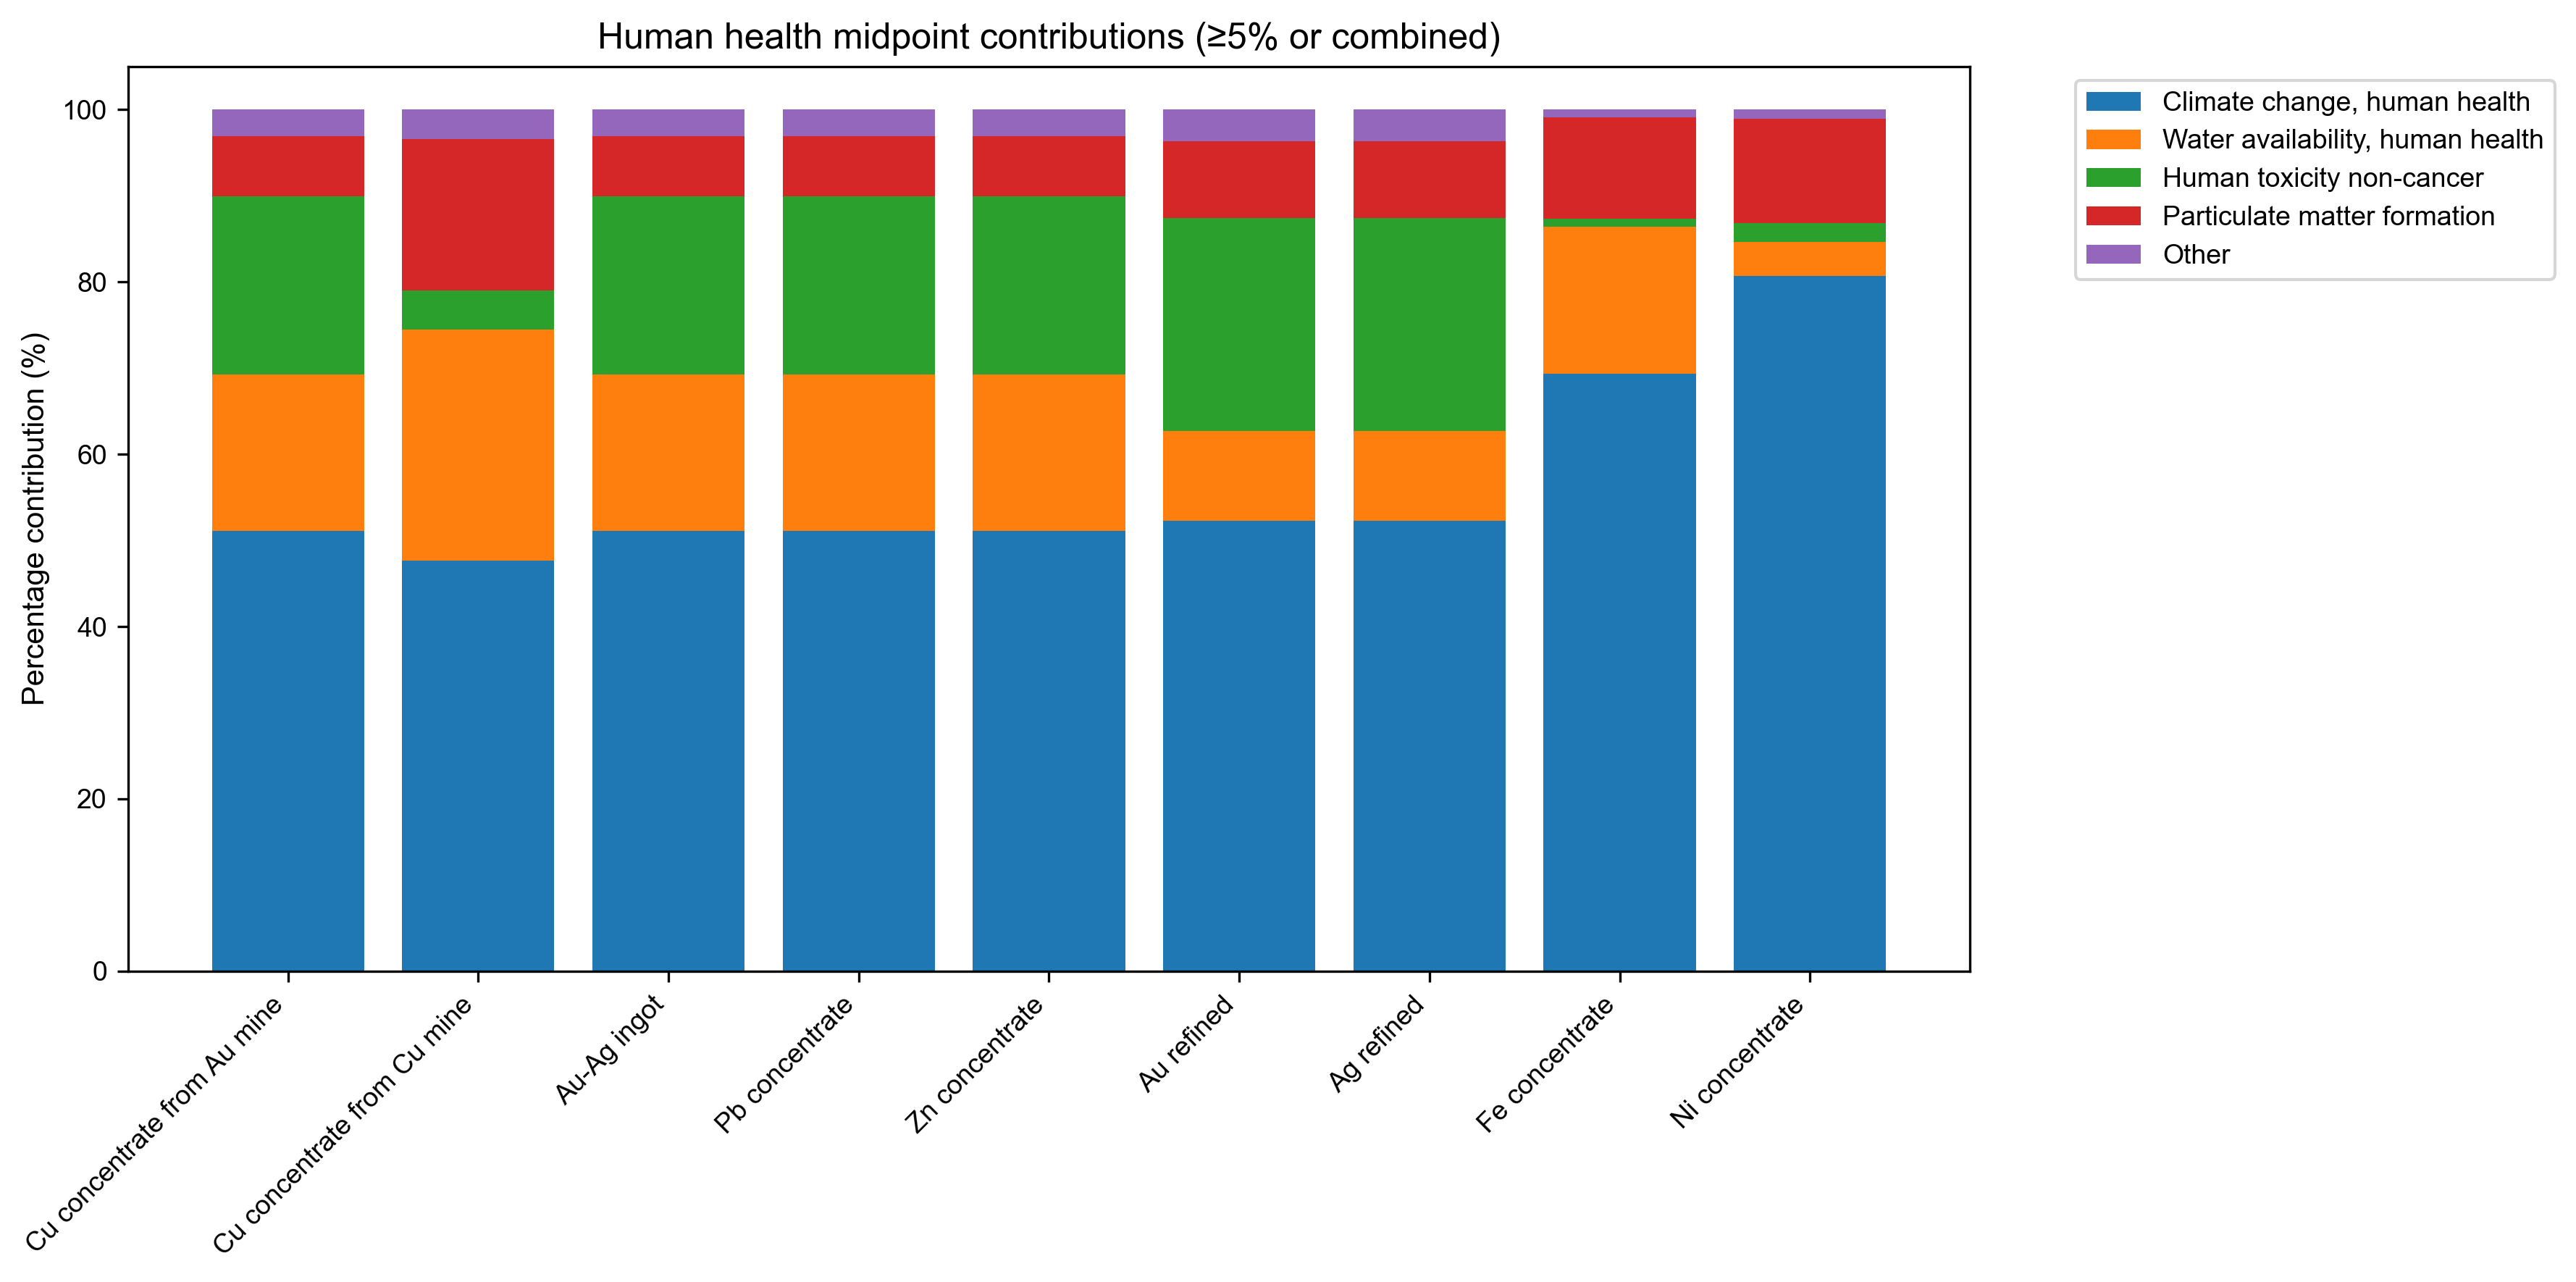

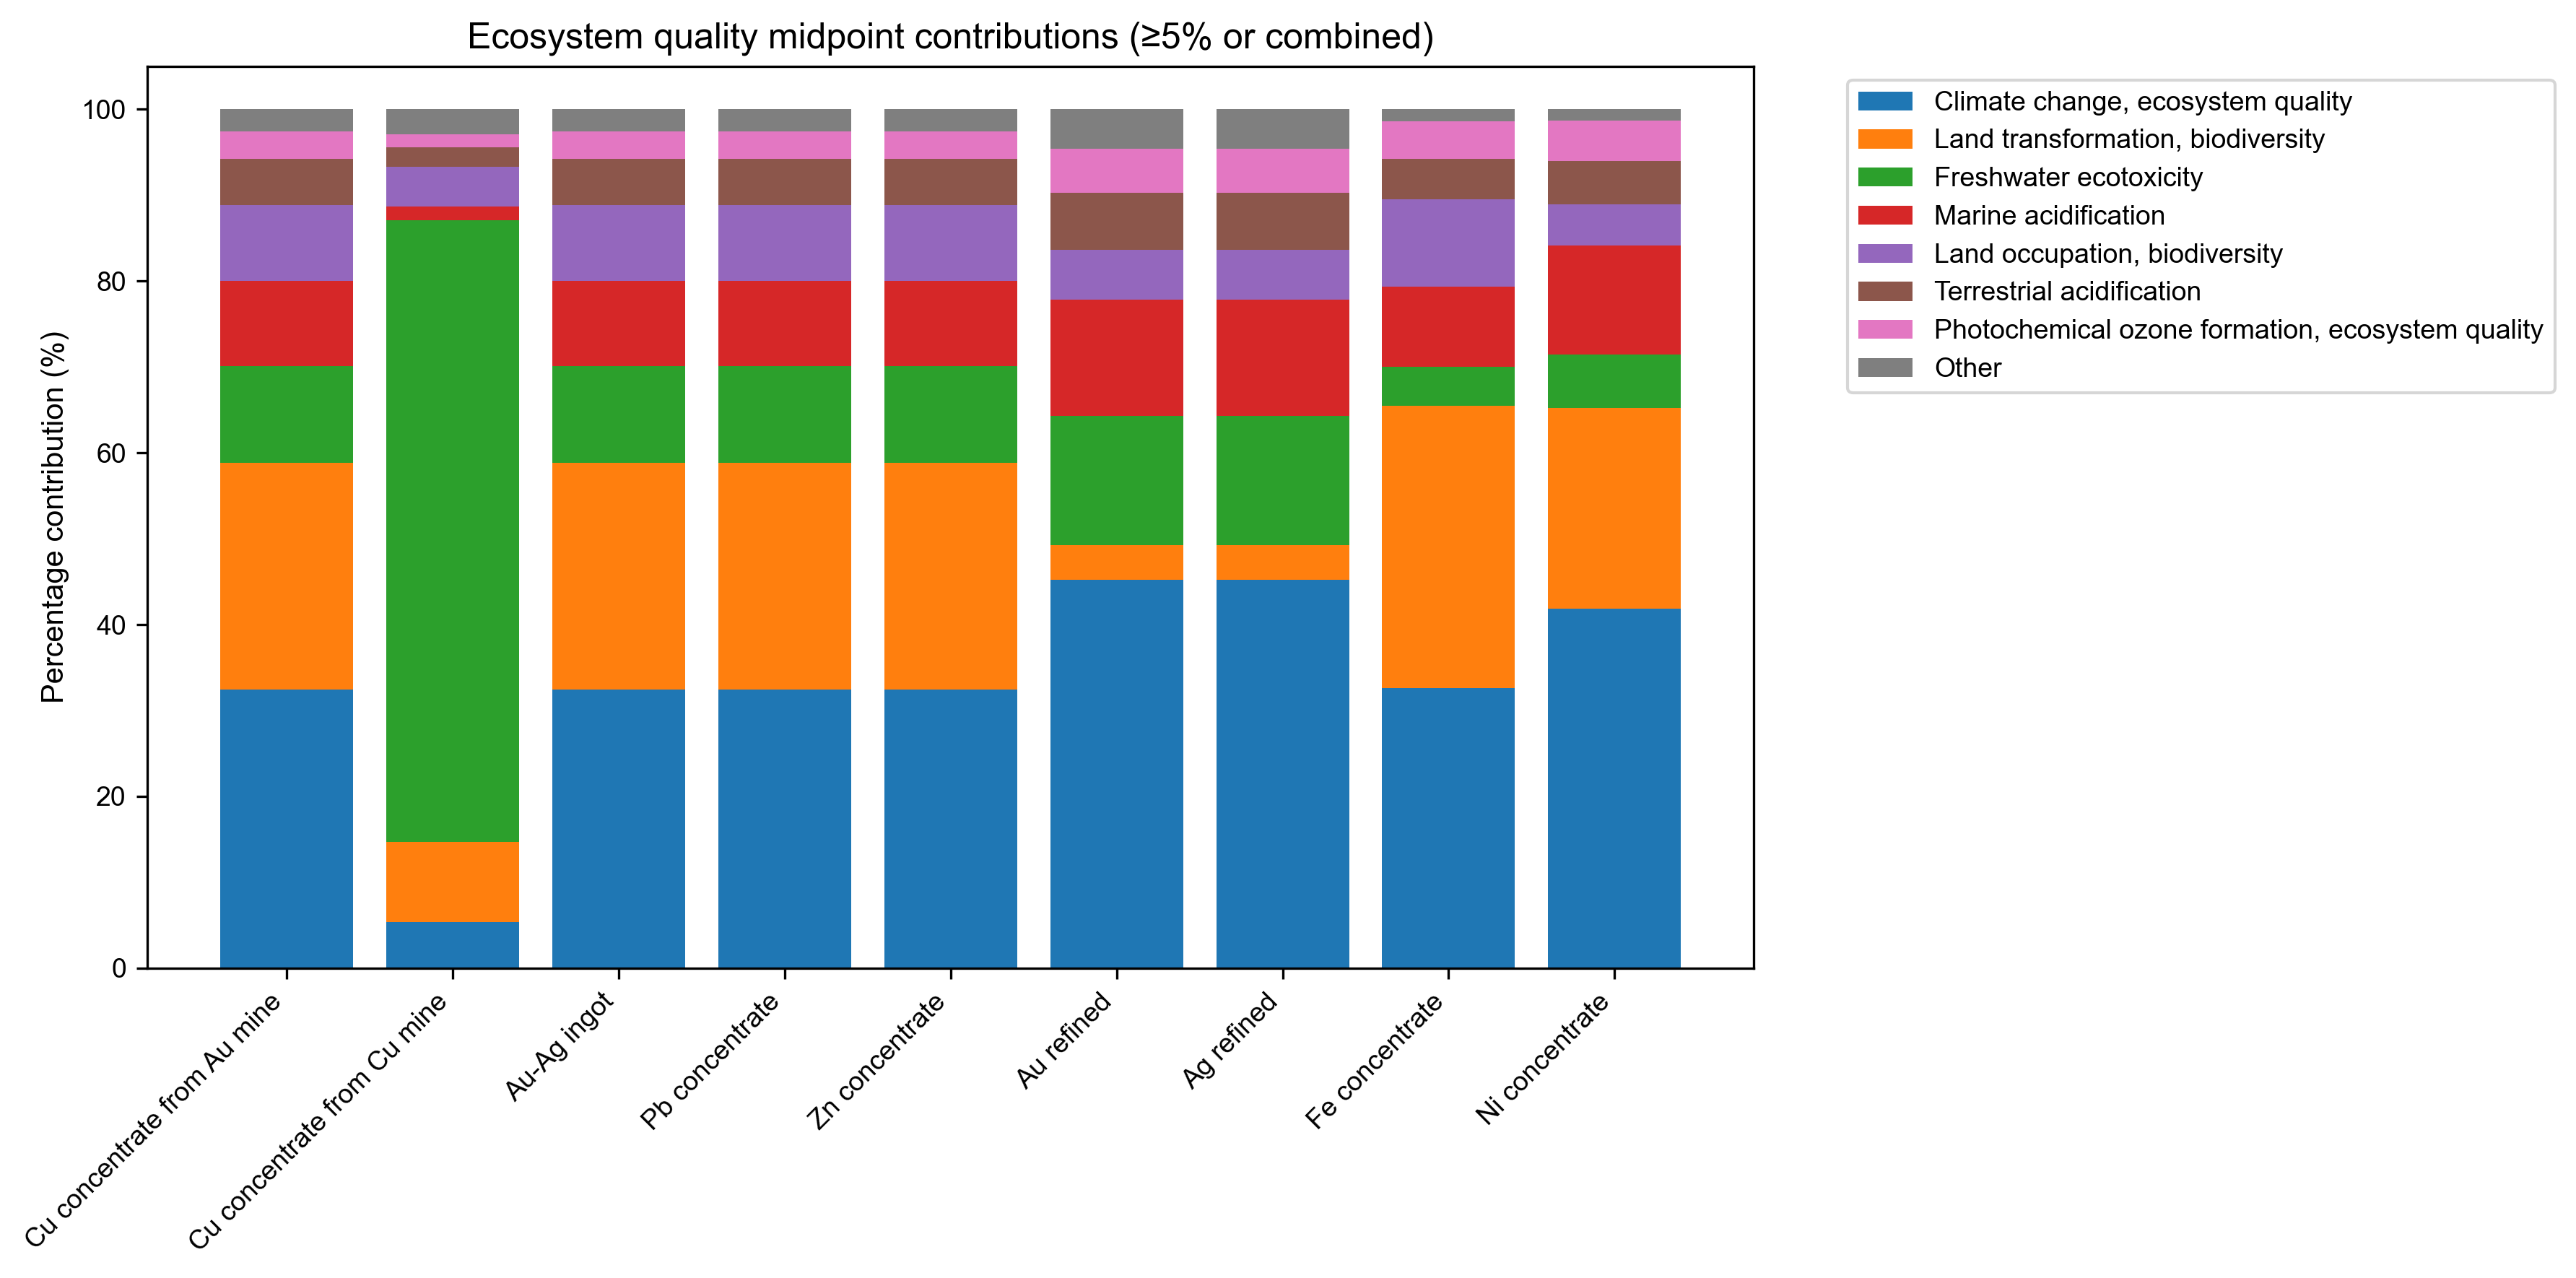

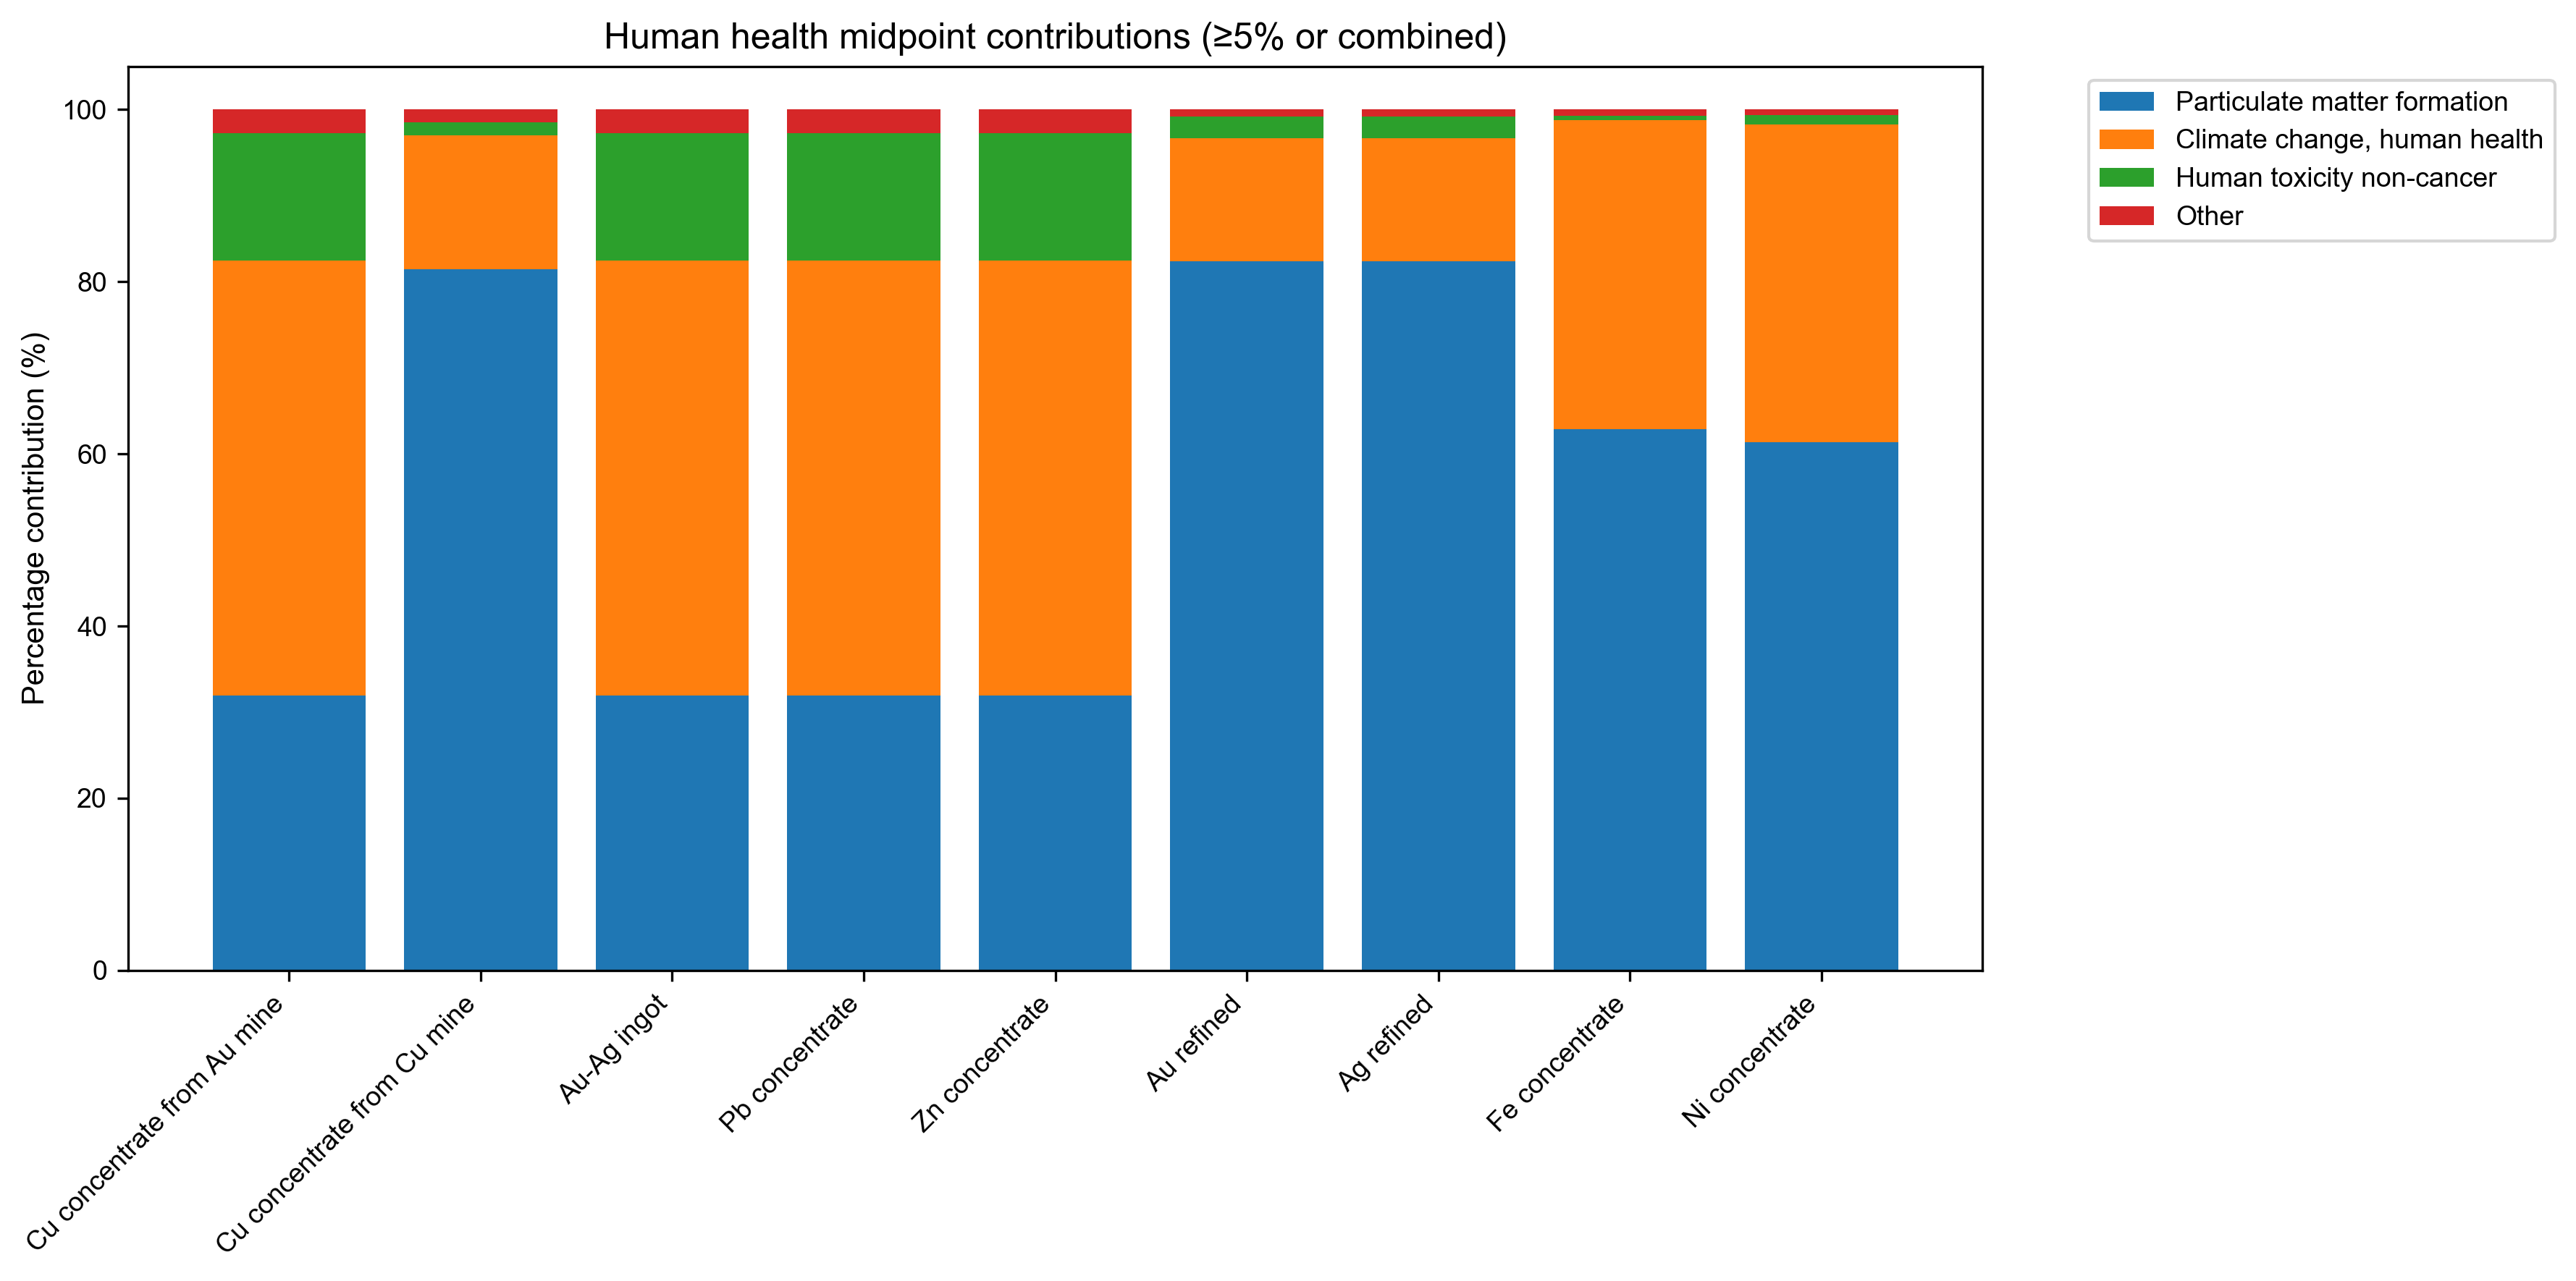

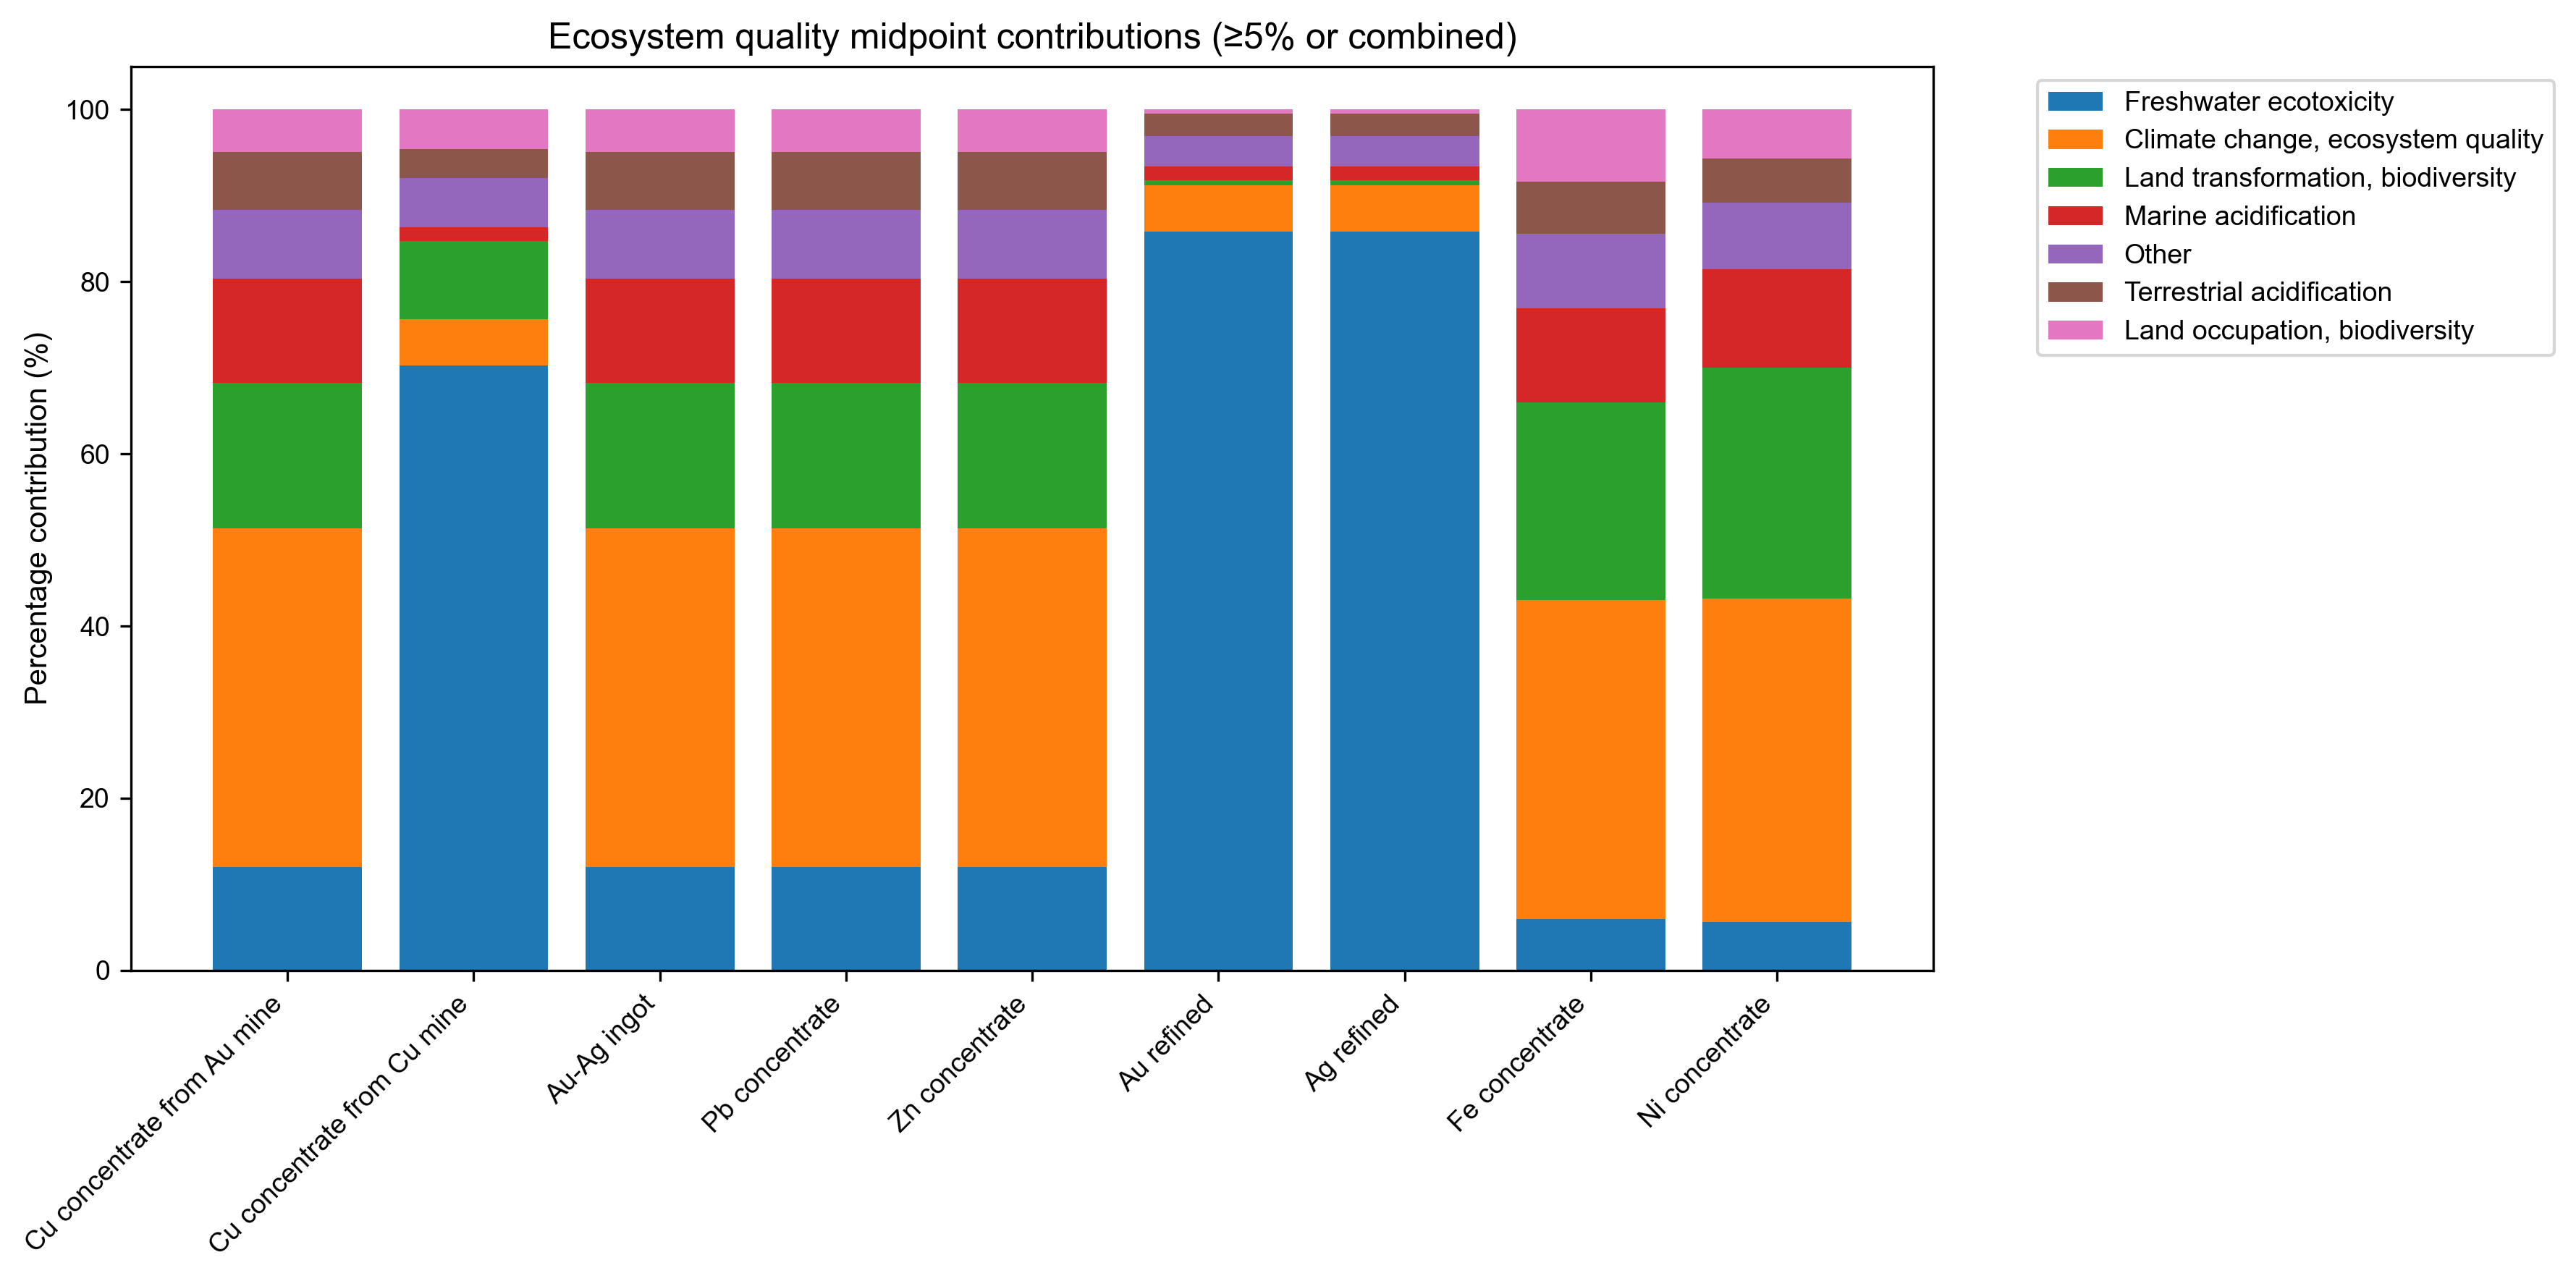

In [15]:
plot_midpoint_contributions(df_ei_hh_contrib, 'Human health', save_path='results/EI/ei_hh_contrib.png')
plot_midpoint_contributions(df_ei_eq_contrib, 'Ecosystem quality', save_path='results/EI/ei_eq_contrib.png')
plot_midpoint_contributions(df_ri_hh_contrib, 'Human health', save_path='results/RI/ri_hh_contrib.png')
plot_midpoint_contributions(df_ri_eq_contrib, 'Ecosystem quality', save_path='results/RI/ri_eq_contrib.png')

# Contribution analysis

In [ ]:
from core.lca_calculation_functions import first_tier_contributions_batch

In [ ]:
hh_endpoint = ("IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10", "Human health", "Total human health")
eq_endpoint = ("IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10", "Ecosystem quality", "Total ecosystem quality")

In [ ]:
ca_ri_hh = first_tier_contributions_batch(INVENTORIES_CA_RI_ds, method_id=hh_endpoint)

In [ ]:
ca_ri_eq = first_tier_contributions_batch(INVENTORIES_CA_RI_ds, method_id=eq_endpoint)

In [ ]:
ca_ri_eq.to_csv(r'results/CA/contribution_analysis_eq.csv', index=False)
ca_ri_hh.to_csv(r'results/CA/contribution_analysis_hh.csv', index=False)

In [ ]:
from utils.visualisation_functions import plot_contribution_subplots

In [ ]:
plot_contribution_subplots(
    ca_ri_hh,
    plot_type="pie",               # or "bar"
    output_folder="results/CA",       # will be created if it doesn't exist
    filename="ca_ri_hh.html"
)

In [ ]:
plot_contribution_subplots(
    ca_ri_eq,
    plot_type="pie",               # or "bar"
    output_folder="results/CA",       # will be created if it doesn't exist
    filename="ca_ri_eq.html"
)

In [ ]:
ca_metallican_eq = first_tier_contributions_batch(INVENTORIES_METALLICAN_AU_Ag_ds, method_id=eq_endpoint)

In [ ]:
ca_metallican_hh = first_tier_contributions_batch(INVENTORIES_METALLICAN_AU_Ag_ds, method_id=hh_endpoint)

In [ ]:
plot_contribution_subplots(
    df_metallican_eq,
    plot_type="pie",               # or "bar"
    output_folder="results/MetalliCan_lci",       # will be created if it doesn't exist
    filename="metallican_ca_eq.html"
)

In [ ]:
plot_contribution_subplots(
df_metallican_hh,
plot_type = "pie",  # or "bar"
output_folder = "results/MetalliCan_lci",  # will be created if it doesn't exist
filename = "metallican_ca_hh.html"
)

# Boxplots per site

In [16]:
df_metallican_eq

NameError: name 'df_metallican_eq' is not defined

In [ ]:
df_ri_eq

In [ ]:
df_ei_eq

In [ ]:
df_ri_eq['Facility'] = ''
df_ri_eq['Commodity']

In [ ]:
from utils.visualisation_functions import plot_styled_boxplots
from utils.constants import agg_mapping_eq, agg_mapping_hh

In [ ]:
# Ecosystem quality (EQ)
plot_styled_boxplots(
    df_metallican_eq,
    agg_mapping_eq,
    title="Ecosystem Quality Midpoints (EQ)",
    output_html="results/MetalliCan_lci/metallican_EQ_boxplot.html"
)

In [ ]:
# Human health (HH)
plot_styled_boxplots(
    df_metallican_hh,
    agg_mapping_hh,
    title="Human Health Midpoints (HH)",
    output_html="results/MetalliCan_lci/metallican_HH_boxplot.html"
)